# Conjoint Analysis

## What is conjoint analysis?

Conjoint analysis is a methodology to analyze how customers value the various features included in a product or a service. For example, a customer regards color of a TV the most important when he or she wants to buy a new TV. Other customer may think size of a TV as the most important factor. Conjoint analysis enables to determine such importance of different features.

## Problem Settings

A TV company wants to know what kind of factors its customers are considering as important. The TV company sells different sizes, type and color of TVs.

## Datasets

- Rank: represents a ranking of 3 different features (TV Size, TV Type, TV Color)
- Stimulus: combination of 3 different features consisting of 3 different TV sizes (32",37",42") , 2 different TV types (LCD, Plasma), and 3 different TV colors (Black, Silver, Anthrazit); For example, A1B1C1 represents 32" LCD black TV. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

%matplotlib inline

[Download this data here](https://drive.google.com/file/d/1HvmWYxh-VV2TveMHakYegbT0DbDC51Zd/view?usp=sharing)

In [2]:
df = pd.read_csv("ConJointInput.csv", sep = ";")
df

,Stimulus,Rank
0,A1B1C1,2
1,A1B1C2,3
2,A1B1C3,1
3,A1B2C1,5
4,A1B2C2,6
5,A1B2C3,4
6,A2B1C1,8
7,A2B1C2,9
8,A2B1C3,7
9,A2B2C1,11


## Preprocessing of data

First step is to introduce dummy variables for every stimulus

There are in total 8 different stimuli, and 18 different combinations


In [3]:
dummy_df = pd.DataFrame(np.zeros((18,9)), columns=["Rank","A1", "A2", "A3", "B1","B2", "C1", "C2", "C3"])

In [4]:
dummy_df.Rank = df.Rank

for index, row in df.iterrows(): 
    stimuli1, stimuli2, stimuli3 = df["Stimulus"].loc[index][:2], \
    df["Stimulus"].loc[index][2:4], df["Stimulus"].loc[index][4:6]
    
    dummy_df.loc[index, [stimuli1,stimuli2,stimuli3]] = 1

In [5]:
dummy_df.head()

,Rank,A1,A2,A3,B1,B2,C1,C2,C3
0,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Insert the proper Stimulus names

In [6]:
full_names = {"Rank":"Rank", \
             "A1": "32\" (81cm)","A2": "37\" (94cm)","A3": "42\" (107cm)", \
             "B1": "Plasma", "B2":"LCD", \
             "C1":"Silver", "C2":"Black", "C3": "Anthrazit",\
            }

dummy_df.rename(columns=full_names, inplace=True)

In [7]:
dummy_df.head()

,Rank,"32"" (81cm)","37"" (94cm)","42"" (107cm)",Plasma,LCD,Silver,Black,Anthrazit
0,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Linear Regression

Linear regression is a method to model the relationship between covariates and response. Here, we consider relationship between features of TV (TV Size, TV Type, TV Color) and rank; Given different combinations of TV Size, TV Type, and TV Color, a TV company wants to know what combination customer ranks the most. 

There are different ways for parameter estimation beside linear regression depending on what kind of rating you have. For example, using Probit or Logit is the output which is not a rank but a decision (1=chose stimulus, 0 = no choice).

Linear regression models are often fitted using the least squares approach, which is minimizing the sum of square errors, but other approaches can be used for fitting. Following figure illustrates linear least squares fitting with $X \in R^2$. The linear function of $X$ that minimizes the sum of squared residuals from $y$ is seeked.

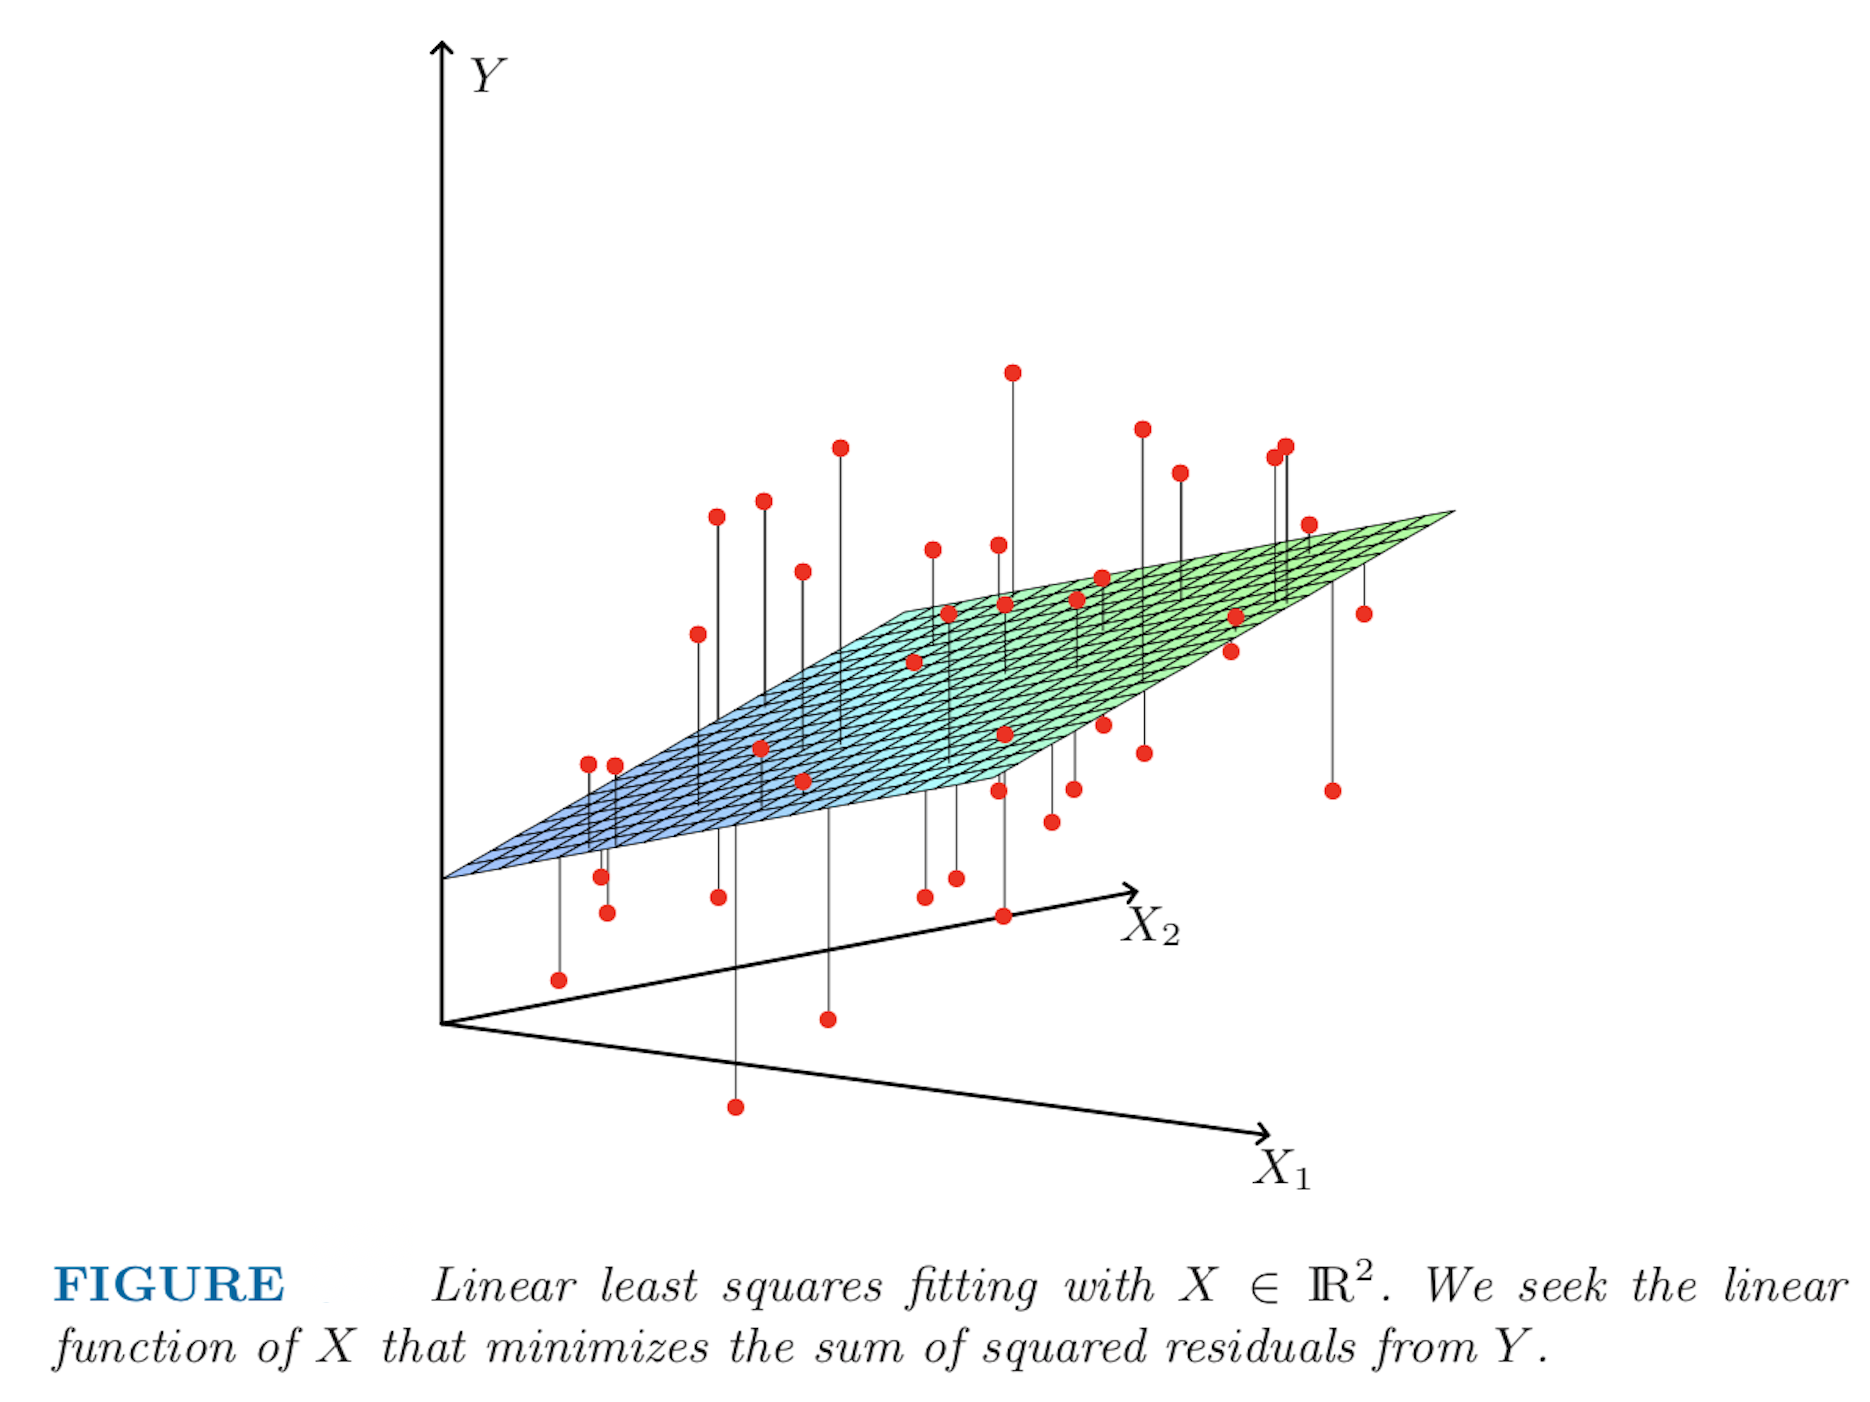

The algorithm of linear regression is summirized as follows;

***
### Linear Regression algorithm
***
Given: Input $N$-dim vector $X^T = (X_1, X_2, ... ,X_n)$ (i.e. covariates, features, variables), $\beta_0, \beta_1, ... , \beta_n$ 

Output: $y \in R$ (i.e. response, dependent variable)

Goal: Find the function such that $y ≈ f(X;\beta)$; $f$ is called as regression function.

$$f(X; \beta) = \beta_0 + \sum_{j=1}^n X_j \beta_j$$

by minimizing the residual sum of squares $RSS$

$$RSS(\beta) = \sum_{i=1}^N (y_i - f(x_i))^2 = \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^n x_{ij} \beta_j \right)^2 $$
***

## Estimate Main Effects with a linear regression

We model the relationship between features of TV (TV Size, TV Type, TV Color) and rank using linear regression with least square fitting mentioned above. In Python, we have two choices of libraries for linear regression; `statsmodels` or `scikit-learn`. Here, we use `statsmodels` for linear regression.

In [8]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
dummy_df.columns

Index(['Rank', '32" (81cm)', '37" (94cm)', '42" (107cm)', 'Plasma', 'LCD',
       'Silver', 'Black', 'Anthrazit'],
      dtype='object')

In [10]:
X = dummy_df[[u'32" (81cm)', u'37" (94cm)', u'42" (107cm)', u'Plasma', u'LCD', u'Silver', u'Black', u'Anthrazit']]
X = sm.add_constant(X)
y = dummy_df.Rank
lr = sm.OLS(y, X). fit()
lr.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.904e+30
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          2.59e-182
Time:                        17:04:39   Log-Likelihood:                 576.03
No. Observations:                  18   AIC:                            -1140.
Df Residuals:                      12   BIC:                            -1135.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3846   4.08e-16   1.08e+16      0.000       4.385       4.385
32" (81cm)     -4.5385   1.26e-15  -3.61e+15      0.000      -4.538      -4.538
37" (94cm)      1.4615   1.26e-15   1.16e+15      0.000       1.462       1.462
42" (107cm)     7.4615   1.26e-15   5.94e+15      0.000       7.462       7.462
Plasma          0.6923   9.06e-16   7.64e+14      0.000       0.692       0.692
LCD             3.6923   9.06e-16   4.07e+15      0.000       3.692       3.692
Silver          1.4615   1.26e-15   1.16e+15      0.000       1.462       1.462
Black           2.4615   1.26e-15   1.96e+15      0.000       2.462       2.462
Anthrazit       0.4615   1.26e-15   3.67e+14      0.000       0.462       0.462
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.203
Skew:                           0.218   Prob(JB):                        0.903
Kurtosis:                       2.715   Cond. No.                     4.35e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Part worth values & relative importance of the stimuli

Importance of Stimuli $S_i = Max(\beta_{ij}) - Min(\beta_{ij});$ $j =$  number of variations in each feature

Relative Importance of Stimuli $R_i = \frac{S_i}{\sum_{i} S_i}$

In [11]:
importance = []
relative_importance = []
range_per_feature = []

begin = "A"
temp_range = []
for stimuli in full_names.keys():
    if stimuli[0] == begin:
        temp_range.append(lr.params[full_names[stimuli]])
    elif stimuli == "Rank":
        range_per_feature.append(temp_range)
    else:
        range_per_feature.append(temp_range)
        begin = stimuli[0]
        temp_range = [lr.params[full_names[stimuli]]]

In [12]:
for item in range_per_feature:
    importance.append(max(item) - min(item))

for item in importance:
    relative_importance.append(100* round(item/sum(importance),3))

In [13]:
mean_rank = []
for i in dummy_df.columns[1:]:
    new_mean_rank = dummy_df["Rank"].loc[dummy_df[i] == 1].mean()
    mean_rank.append(new_mean_rank)
    
#total Mean or, "basic utility" is used as the "zero alternative"
total_mean_rank = sum(mean_rank) / len(mean_rank)

part_worths = {}
for i in range(len(mean_rank)):
    name = full_names[sorted(full_names.keys())[i]]
    part_worths[name] = mean_rank[i] - total_mean_rank

In [14]:
part_worths

{'32" (81cm)': -6.0,
 '37" (94cm)': 0.0,
 '42" (107cm)': 6.0,
 'Anthrazit': -1.0,
 'Black': 1.0,
 'LCD': 1.5,
 'Plasma': -1.5,
 'Silver': 0.0}

## Plotting part worths

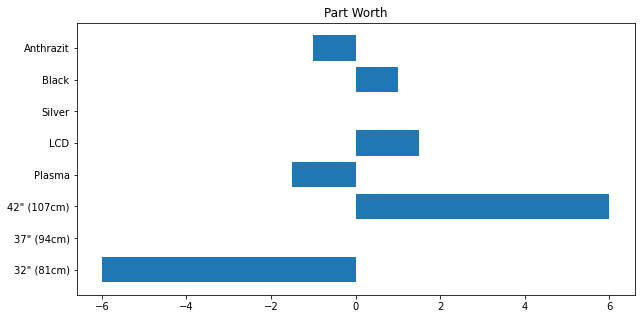

In [15]:
# Plot Part Worth
plt.figure(figsize=(10,5))
plt.barh(range(len(part_worths)), list(part_worths.values()), align='center')
plt.yticks(range(len(part_worths)), list(part_worths.keys()))
plt.title('Part Worth')
plt.show()

## Summary & Results

In [16]:
print ("Relative Importance of Feature:\n\nMonitor Size:",relative_importance[0], "%",\
"\nType of Monitor:", relative_importance[1], "%", "\nColor of TV:", relative_importance[2], "%\n\n")

print ("--"*30)

print ("Importance of Feature:\n\nMonitor Size:",importance[0],\
"\nType of Monitor:", importance[1],  "\nColor of TV:", importance[2])

Relative Importance of Feature:

Monitor Size: 44.4 % 
Type of Monitor: 44.4 % 
Color of TV: 11.1 %


------------------------------------------------------------
Importance of Feature:

Monitor Size: 11.999999999999998 
Type of Monitor: 11.999999999999998 
Color of TV: 2.9999999999999956


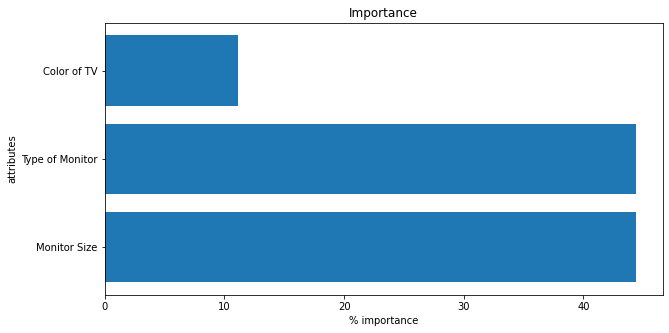

In [17]:
plt.figure(figsize=(10,5))
plt.barh(range(len(relative_importance)), list(relative_importance), align='center')
plt.yticks(range(len(relative_importance)), ('Monitor Size', 'Type of Monitor', 'Color of TV'))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.title('Importance')
plt.show()

What would be the optimal product bundle? <p>
42", LCD, Black

## Reference
Hastie, T., Tibshirani, R., and Friedman, J. (2009) The Elements of Statistical Learning, Second Edition, Springer.